In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
skin=pd.read_csv(r'C:\Users\admin\Downloads\hmnist_features_5310_224_3.csv')

# DATA PREPROCESSING

In [18]:
skin

,age,localization,cell_type_idx,Blue_mean,Green_mean,Red_mean,Gray_mean,output_variable
0,70.0,4,4,1.04,0.90,1.06,0.64,1
1,45.0,13,4,0.85,0.79,1.36,0.66,0
2,45.0,5,4,0.87,0.87,1.27,0.73,0
3,45.0,9,4,0.77,0.80,1.43,0.57,0
4,55.0,8,4,0.91,0.86,1.24,0.63,0
...,...,...,...,...,...,...,...,...
5305,40.0,0,0,0.95,0.93,1.12,0.71,1
5306,40.0,0,0,0.94,0.94,1.12,0.64,1
5307,40.0,0,0,0.95,0.95,1.10,0.79,1
5308,80.0,4,0,0.98,0.91,1.11,0.66,1


In [7]:

skin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5310 entries, 0 to 5309
Data columns (total 8 columns):
age                5310 non-null float64
localization       5310 non-null int64
cell_type_idx      5310 non-null int64
Blue_mean          5310 non-null float64
Green_mean         5310 non-null float64
Red_mean           5310 non-null float64
Gray_mean          5310 non-null float64
output_variable    5310 non-null int64
dtypes: float64(5), int64(3)
memory usage: 332.0 KB


In [8]:
skin.isnull().sum()

age                0
localization       0
cell_type_idx      0
Blue_mean          0
Green_mean         0
Red_mean           0
Gray_mean          0
output_variable    0
dtype: int64

In [9]:
skin.shape

(5310, 8)

In [10]:
if len(skin[skin.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(skin[skin.duplicated()]))
    print(skin[skin.duplicated(keep=False)].sort_values(by=list(skin.columns)).head())
else:
    print("No duplicated entries found")
    

No. of duplicated entries:  19
       age  localization  cell_type_idx  Blue_mean  Green_mean  Red_mean  \
529   35.0             8              4       0.92        0.83      1.25   
530   35.0             8              4       0.92        0.83      1.25   
470   45.0             1              4       0.83        0.83      1.34   
1598  45.0             1              4       0.83        0.83      1.34   
377   45.0             8              4       0.93        0.81      1.26   

      Gray_mean  output_variable  
529        0.70                0  
530        0.70                0  
470        0.69                1  
1598       0.69                1  
377        0.64                1  


In [11]:
skin.drop_duplicates(inplace=True)

In [12]:
print(skin.median())
print(skin.mean())


age                55.00
localization        8.00
cell_type_idx       4.00
Blue_mean           0.91
Green_mean          0.87
Red_mean            1.21
Gray_mean           0.62
output_variable     0.00
dtype: float64
age                57.806146
localization        6.203175
cell_type_idx       3.290115
Blue_mean           0.903421
Green_mean          0.864530
Red_mean            1.232068
Gray_mean           0.624031
output_variable     0.446229
dtype: float64


In [13]:
skin.describe()

,age,localization,cell_type_idx,Blue_mean,Green_mean,Red_mean,Gray_mean,output_variable
count,5291.000000,5291.000000,5291.000000,5291.000000,5291.000000,5291.000000,5291.000000,5291.000000
mean,57.806146,6.203175,3.290115,0.903421,0.864530,1.232068,0.624031,0.446229
std,15.165935,4.460551,1.588931,0.079650,0.058465,0.123325,0.073956,0.497147
min,0.000000,0.000000,0.000000,0.600000,0.540000,0.920000,0.250000,0.000000
25%,45.000000,1.000000,2.000000,0.850000,0.820000,1.130000,0.570000,0.000000
50%,55.000000,8.000000,4.000000,0.910000,0.870000,1.210000,0.620000,0.000000
75%,70.000000,11.000000,4.000000,0.960000,0.910000,1.330000,0.680000,1.000000
max,85.000000,13.000000,6.000000,1.180000,0.990000,1.810000,0.900000,1.000000


In [14]:
def min_max_values(col):
    top=skin[col].idxmax()
    top_o=pd.DataFrame(skin.loc[top])
    
    bottom=skin[col].idxmin()
    bottom_o=pd.DataFrame(skin.loc[bottom])
    
    min_max_obs=pd.concat([top_o,bottom_o],axis=1)
    
    return min_max_obs

In [15]:
min_max_values('output_variable')

,1,0
age,45.00,70.00
localization,13.00,4.00
cell_type_idx,4.00,4.00
Blue_mean,0.85,1.04
Green_mean,0.79,0.90
Red_mean,1.36,1.06
Gray_mean,0.66,0.64
output_variable,1.00,0.00


# DATA VISUALIZATION

(array([  30.,    7.,   53.,   82.,  606., 1324.,  624.,  966., 1014.,
         585.]),
 array([ 0. ,  8.5, 17. , 25.5, 34. , 42.5, 51. , 59.5, 68. , 76.5, 85. ]),
 <a list of 10 Patch objects>)

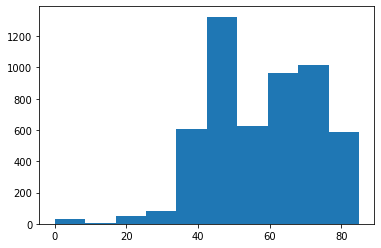

In [16]:
num_bins=10
plt.hist(skin['age'])

(array([ 327.,  512.,    0., 1097.,    0.,  114., 1987.,    0., 1112.,
         142.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

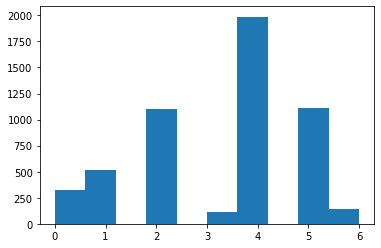

In [17]:
num_bins=10
plt.hist(skin['cell_type_idx'])

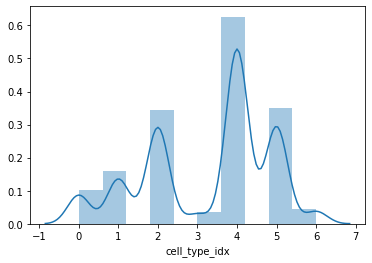

In [18]:
sns.distplot(skin['cell_type_idx'],bins=10)


In [19]:
print(skin.groupby('cell_type_idx').size())

cell_type_idx
0     327
1     512
2    1097
3     114
4    1987
5    1112
6     142
dtype: int64


In [20]:
print(skin.groupby('age').size())


age
0.00       9
5.00      21
10.00      2
15.00      5
20.00     21
25.00     32
30.00     82
35.00    226
40.00    380
45.00    656
50.00    668
51.86     12
55.00    612
60.00    488
65.00    478
70.00    560
75.00    454
80.00    333
85.00    252
dtype: int64


In [21]:
a=print(skin.groupby('localization').size())


localization
0      443
1     1041
2      211
3       29
4      653
5       90
6       30
7       43
8     1179
9      105
10      86
11     708
12      46
13     627
dtype: int64


In [22]:
print(skin.output_variable.unique())
print(skin.localization.unique())

[0 1]
[ 4 13  5  9  8  0 11  6  1 10  7  2 12  3]


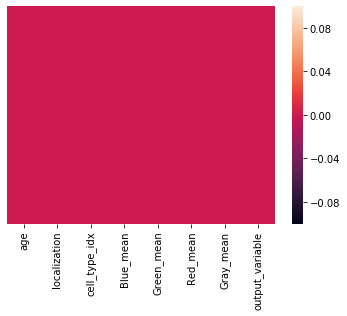

In [23]:
sns.heatmap(skin.isnull(),yticklabels=False)

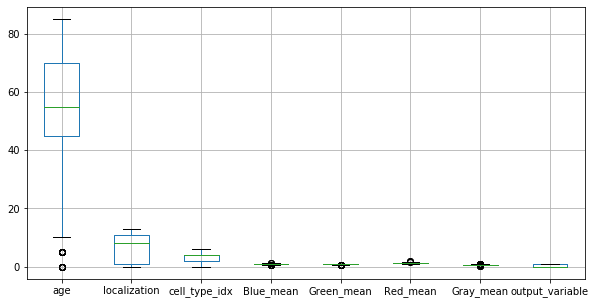

In [24]:
skin.boxplot(figsize=(10,5))

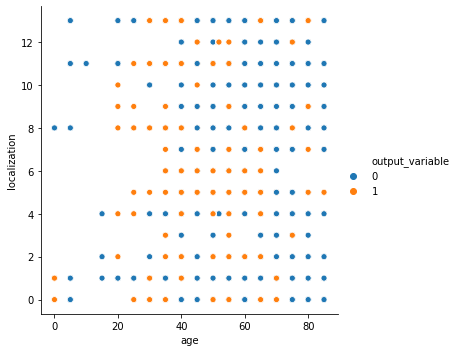

In [25]:
sns.relplot(x="age", y="localization", 
            hue="output_variable",
            data=skin)

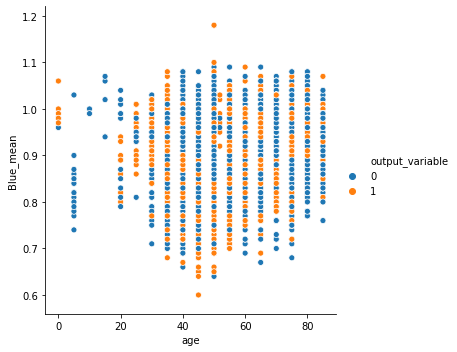

In [27]:
sns.relplot(x="age", y="Blue_mean", 
            hue="output_variable",
            data=skin)

(array([  30.,    7.,   53.,   82.,  606., 1324.,  624.,  966., 1014.,
         585.]),
 array([ 0. ,  8.5, 17. , 25.5, 34. , 42.5, 51. , 59.5, 68. , 76.5, 85. ]),
 <a list of 10 Patch objects>)

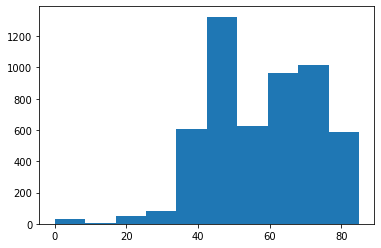

In [28]:
plt.hist(skin['age'])


(array([1484.,  211.,   29.,  743.,   30.,   43., 1284.,   86.,  708.,
         673.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <a list of 10 Patch objects>)

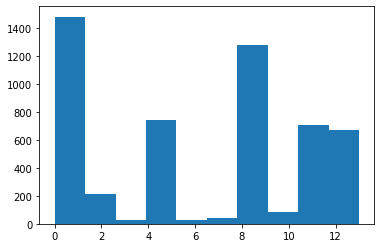

In [29]:
plt.hist(skin['localization'])

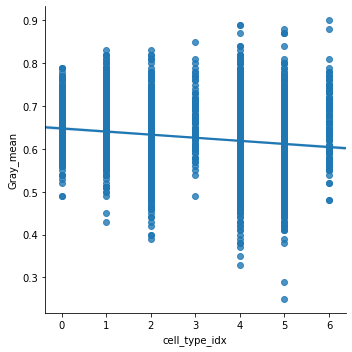

In [30]:
sns.lmplot(x="cell_type_idx", y="Gray_mean", 
           data=skin)

<BarContainer object of 5291 artists>

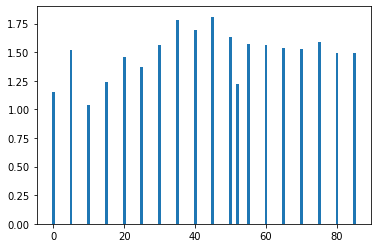

In [33]:
plt.bar(skin['age'], skin['Red_mean'])

''

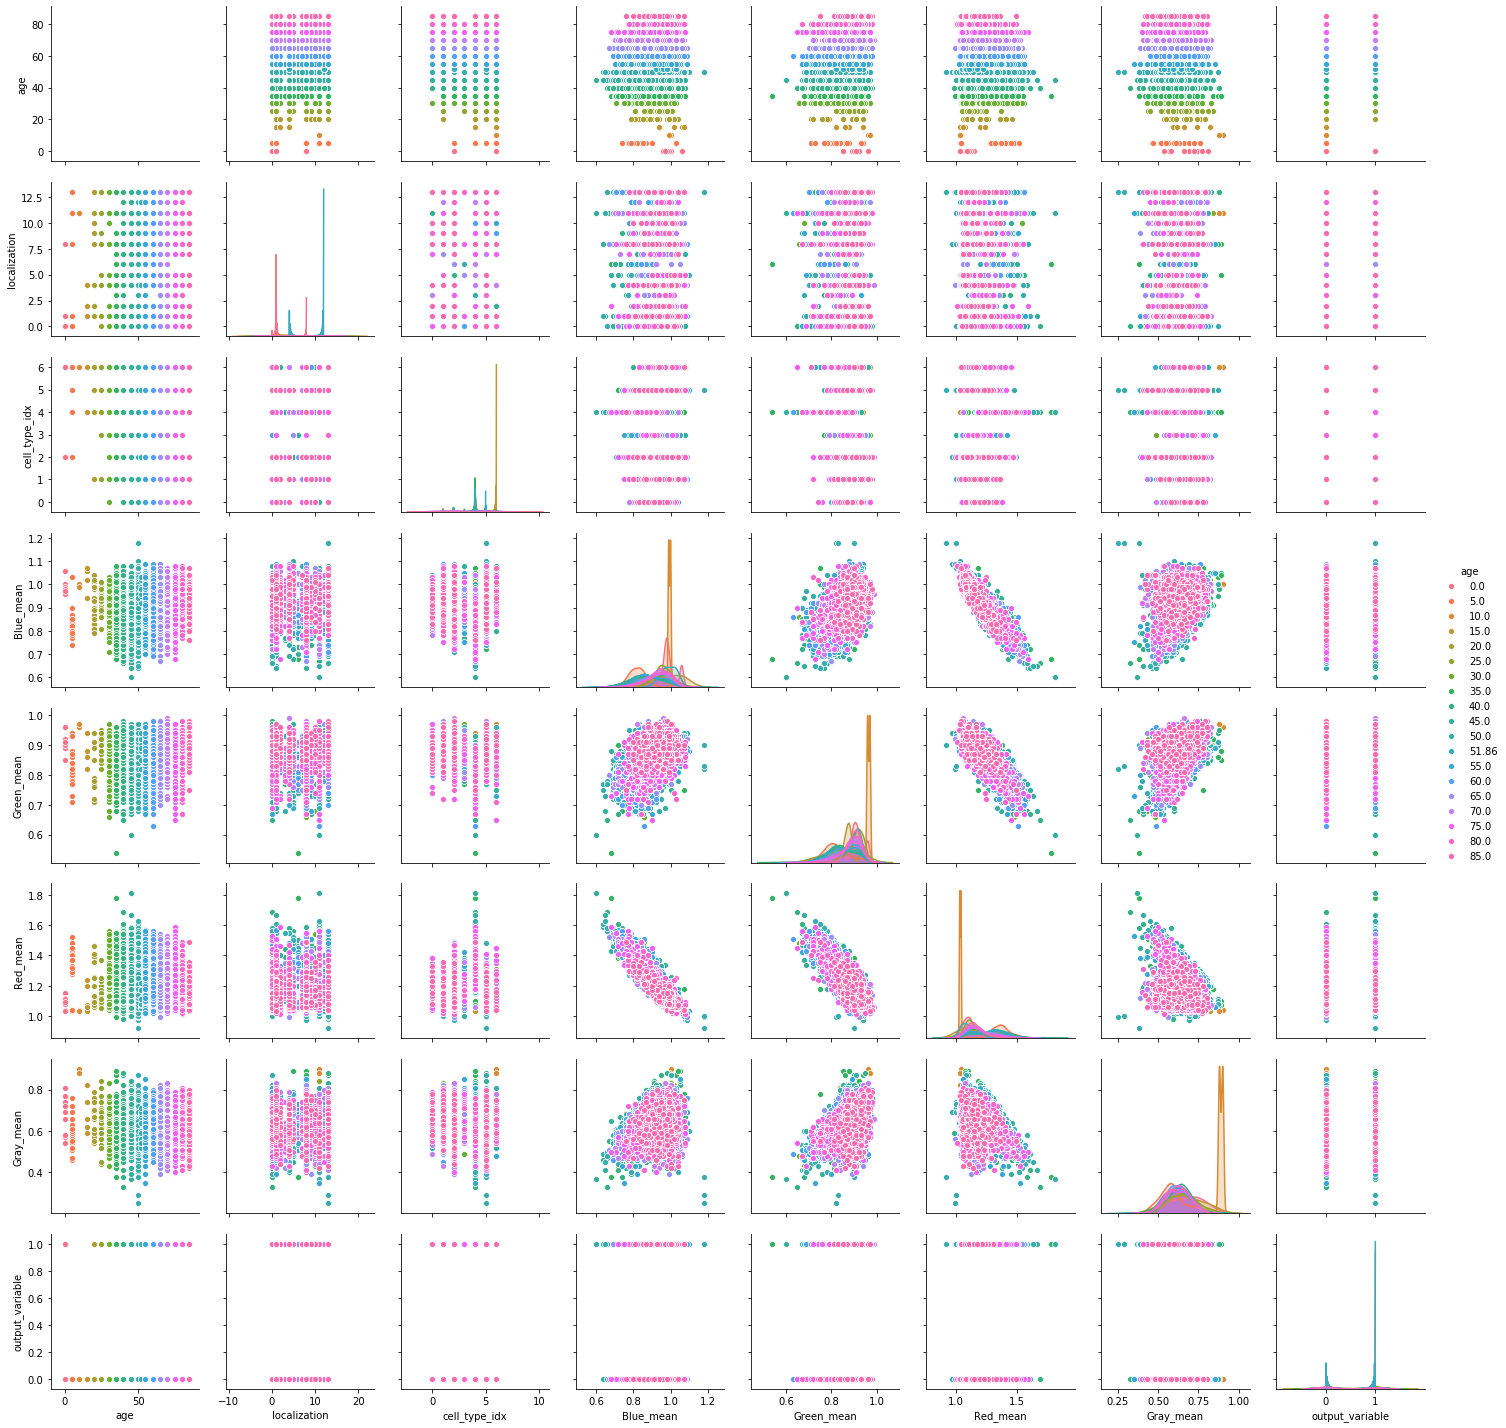

In [35]:
sns.pairplot(data=skin, hue='age')
;

In [ ]:
skin.head()

<BarContainer object of 5291 artists>

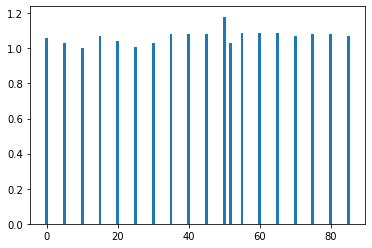

In [36]:
x=skin['age']
y=skin['Blue_mean']
plt.bar(x,y)

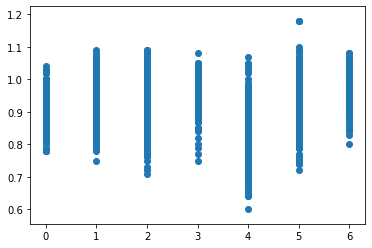

In [37]:
x=skin['cell_type_idx']
y=skin['Blue_mean']
plt.scatter(x,y)

<BarContainer object of 5291 artists>

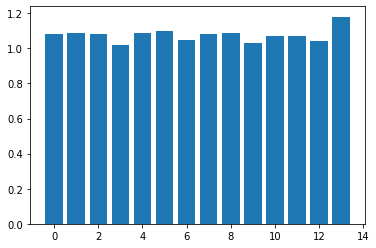

In [38]:
x=skin['localization']
y=skin['Blue_mean']
plt.bar(x,y)

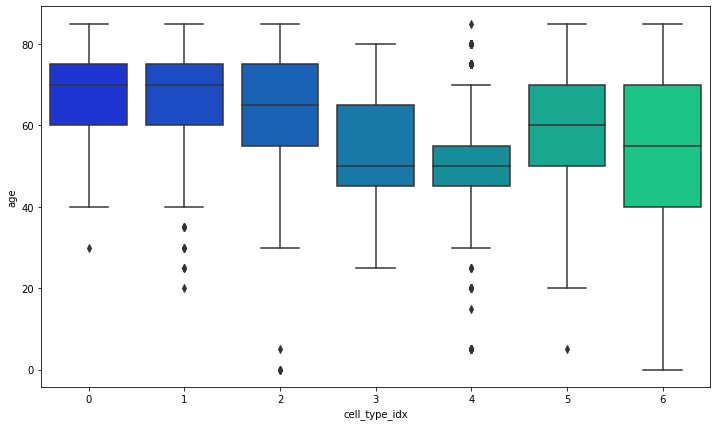

In [39]:
plt.figure(figsize=(12,7))
sns.boxplot(x='cell_type_idx',y='age',data=skin,palette='winter')

# PREDICTIVE MODELING

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn import utils

X = skin.iloc[:, :-1]
y = skin.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [5]:
#Model
LR = LogisticRegression()

#fiting the model
LR.fit(X_train,y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
print("Accuracy ", LR.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
print(confusion_matrix(y_pred, y_test))
#sns.heatmap(cm, annot=True, fmt='g')
plt.show()

Accuracy  58.65963855421686
[[221 177]
 [372 558]]


In [20]:
LR.fit(skin['output_variable'],skin.age)


ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 0. ... 1. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.77      0.68       731
           1       0.57      0.37      0.45       592

    accuracy                           0.59      1323
   macro avg       0.59      0.57      0.56      1323
weighted avg       0.59      0.59      0.57      1323



In [43]:
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
print(training_scores_encoded)
print(utils.multiclass.type_of_target(y_train.astype(int)))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(training_scores_encoded))

[0 0 0 ... 0 0 0]
binary
binary
binary


In [44]:
#Model
LR = LogisticRegression()

#fiting the model
LR.fit(X_train,training_scores_encoded)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
print("Accuracy ", LR.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
print(confusion_matrix(y_pred, y_test))
#sns.heatmap(cm, annot=True, fmt='g')
plt.show()


Accuracy  59.25925925925925
[[564 372]
 [167 220]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
#Model
model = GradientBoostingClassifier()

#fiting the model
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

#Accuracy
print("Accuracy ", model.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
print(confusion_matrix(y_pred, y_test))
#sns.heatmap(cm, annot=True, fmt='g')
plt.show()

Accuracy  62.207105064247926
[[508 277]
 [223 315]]


In [ ]:
print(y_train)

In [ ]:
confusion_matrix(y_pred, y_test)

In [46]:
DT = DecisionTreeClassifier()

#fiting the model
DT.fit(X_train, y_train)

#prediction
y_pred = DT.predict(X_test)

#Accuracy
print("Accuracy ", DT.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
print(confusion_matrix(y_pred, y_test))
#sns.heatmap(cm, annot=True, fmt='g')
plt.show()

Accuracy  60.16628873771731
[[443 239]
 [288 353]]


In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

print("Predicted value: ", y_pred)

print("\nAccuracy: ", bag_clf.score(X_test,y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
print(confusion_matrix(y_pred, y_test))
#sns.heatmap(cm, annot=True, fmt='g')
plt.show()

Predicted value:  [1 0 1 ... 0 0 1]

Accuracy:  62.585034013605444
[[556 320]
 [175 272]]


Predicted value:  [1 0 1 ... 0 0 1]

Accuracy:  66.06198034769464


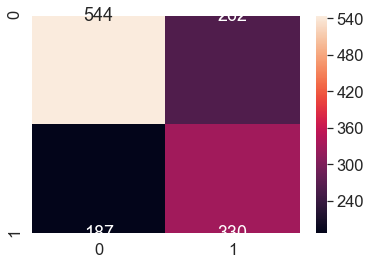

In [48]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=10000,
    max_samples=1000, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

print("Predicted value: ", y_pred)

print("\nAccuracy: ", bag_clf.score(X_test,y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

Accuracy  62.207105064247926


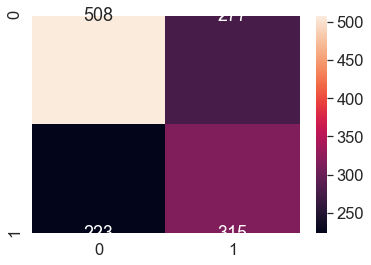

In [49]:
#Model
model = GradientBoostingClassifier()

#fiting the model
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

#Accuracy
print("Accuracy ", model.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [54]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap=True, class_weight=None,
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rfc.fit(X_train,y_train)

y_pred_rfc = rfc.predict(X_test)

print("Accuracy: ", rfc.score(X_test,y_test)*100)

Accuracy:  66.06198034769464


In [57]:
# Load libraries
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Set random seed
np.random.seed(0)

# Create a pipeline
pipe = Pipeline([('classifier', RandomForestClassifier())])

# Create space of candidate learning algorithms and their hyperparameters
search_space = [{'classifier': [LogisticRegression()],
                 'classifier__penalty': ['l1', 'l2'],
                 'classifier__C': np.logspace(0, 4, 10)},
                {'classifier': [RandomForestClassifier()],
                 'classifier__n_estimators': [10, 100, 1000],
                 'classifier__max_features': [1, 2, 3]}]


# Create grid search 
clf = GridSearchCV(pipe, search_space, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(X_train, y_train)

# View best model
best_model.best_estimator_.get_params()['classifier']


# Random Forest Classifier

rfc = RandomForestClassifier(bootstrap=True,class_weight=None,
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rfc.fit(X_train,y_train)

y_pred_rfc = rfc.predict(X_test)

print("Accuracy: ", rfc.score(X_test,y_test)*100)
;

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy:  66.21315192743764


''

In [60]:
rfc = RandomForestClassifier(bootstrap=True,  class_weight=None,
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rfc.fit(X_train,y_train)

y_pred_rfc = rfc.predict(X_test)

print("Accuracy: ", rfc.score(X_test,y_test)*100)

Accuracy:  65.98639455782312
